In [11]:
from pool_class import *

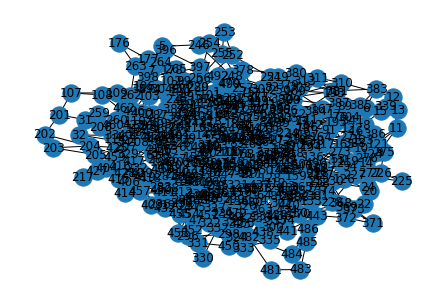

In [70]:
import networkx as nx 
n = 500
G = nx.connected_watts_strogatz_graph(n, k=4, p=0.4)
nx.draw(G, with_labels=True)
G0 = U.from_networkx(G)
G0.x = torch.randn(n,3) # feature_size = 3
edge_index = G0.edge_index
x = G0.x

In [39]:
# Large data set
# from torch_geometric.datasets import Planetoid
# from torch_geometric.transforms import NormalizeFeatures
# from torch_geometric.transforms.largest_connected_components import LargestConnectedComponents
# import networkx as nx
# dataset = Planetoid(root='data/Planetoid', name='Cora', transform=NormalizeFeatures())
# data = dataset[0]
# data = LargestConnectedComponents(1)(data)
# x = data.x 
# edge_index = data.edge_index

In [71]:
edge_index = G0.edge_index
x = G0.x
pooling_layer = pooling(in_channels=x.shape[1], score_method=2, p1=0.8, p2=0.95, aggregate_score_method='avg')
new_edge_index, new_adjacency_matrix, new_x, score_assignment_matrix, edge_index = pooling_layer.forward(edge_index, x)
original_x, origianl_edge_index = pooling_layer.unpool(new_x, score_assignment_matrix, edge_index)
# from torch_geometric.data import Data
# data_new = Data(x=new_x, edge_index=new_edge_index)
# G_new = U.to_networkx(data_new, to_undirected=True)
# nx.draw(G_new)

In [72]:
from torch_geometric.nn import EdgePooling
edge_index = G0.edge_index
x = G0.x
pooling_layer = EdgePooling(in_channels=x.shape[1])
batch = torch.zeros(x.shape[0]).type(torch.int64) 
x, edge_index, _, _  = pooling_layer(x, edge_index, batch=batch)
